<a href="https://colab.research.google.com/github/saurabhaloneai/Pytorch-complete/blob/main/PyTorch_DAY_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

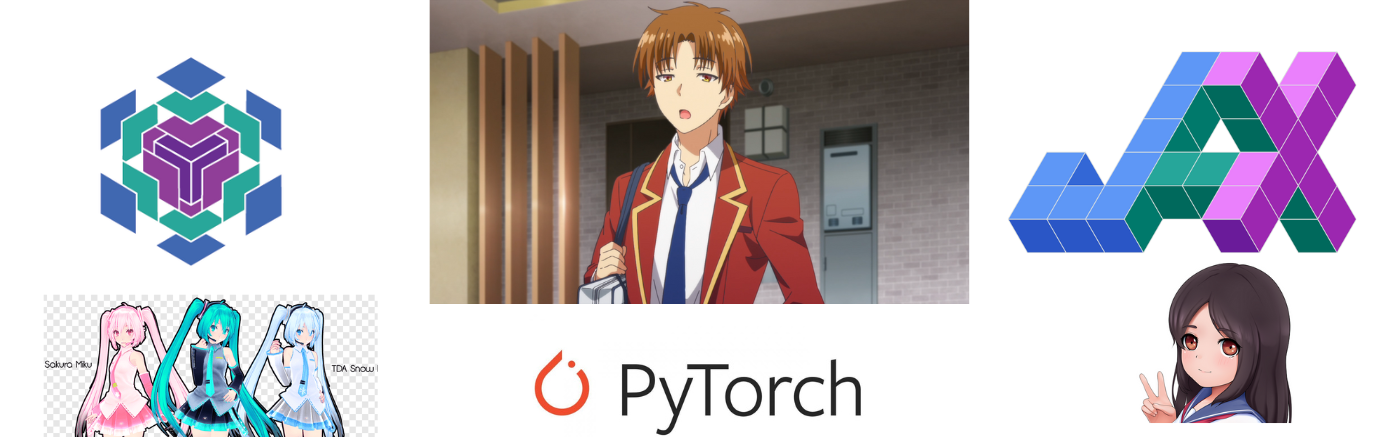

In [6]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

**What is CNN and how it works ?**

A convolutional neural network (CNN) is a type of artificial neural network that is specifically designed for processing data that has a grid-like structure, such as images. CNNs are inspired by the human visual system, and they work by convolving the input data with a series of filters to extract features at different levels of abstraction.

The basic building block of a CNN is a convolutional layer. A convolutional layer consists of a set of filters, each of which is a small matrix of weights. The filters are applied to the input data in a sliding window fashion, and the output of each filter is a feature map. The feature maps are then passed through a series of activation functions, such as the ReLU function, to produce a final output.

CNNs are very powerful for image classification and object detection tasks. They are also used in a variety of other applications, such as natural language processing and speech recognition.

**Here is a simplified example of how a *CNN*  works:**

- The input data is an image.

- The image is passed through a series of convolutional layers.

- Each convolutional layer applies a set of filters to the input data, producing a set of feature maps.

- The feature maps are passed through a series of activation functions.

- The final output is a classification label.

CNNs are very powerful, but they can also be computationally expensive to train. However, there are a number of techniques that can be used to reduce the computational cost of training CNNs, such as using GPUs and batch normalization.

In [5]:
torch.__version__

'2.1.0+cu121'

## 1. Data





In [17]:
from torchvision import datasets

train_data = datasets.FashionMNIST(

   root = "data",

   train = True ,

   download = True ,

   transform = torchvision.transforms.ToTensor(),

   target_transform = None

)

test_data = datasets.FashionMNIST(

                                  root = "data",
                                  train = False ,
                                  download = True,
                                  transform = torchvision.transforms.ToTensor(),
                                  target_transform = None

)

len(train_data),len(test_data)

(60000, 10000)

In [46]:
classes_name = train_data.classes
class_name,len(class_name)

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 10)

In [31]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [36]:
image.shape, label ### C W H - > color :
# gray scale images only have one channel of colors

(torch.Size([1, 28, 28]), 9)

##visualise

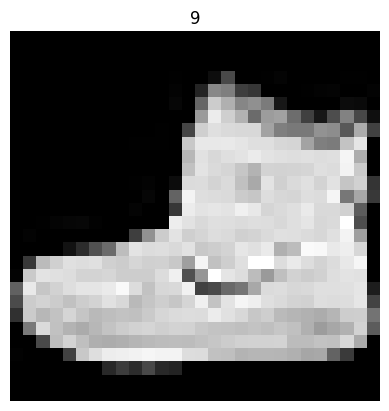

In [45]:
image, label = train_data[0]

plt.imshow(image.squeeze(),cmap ="gray")
plt.title(label);
plt.axis(False);

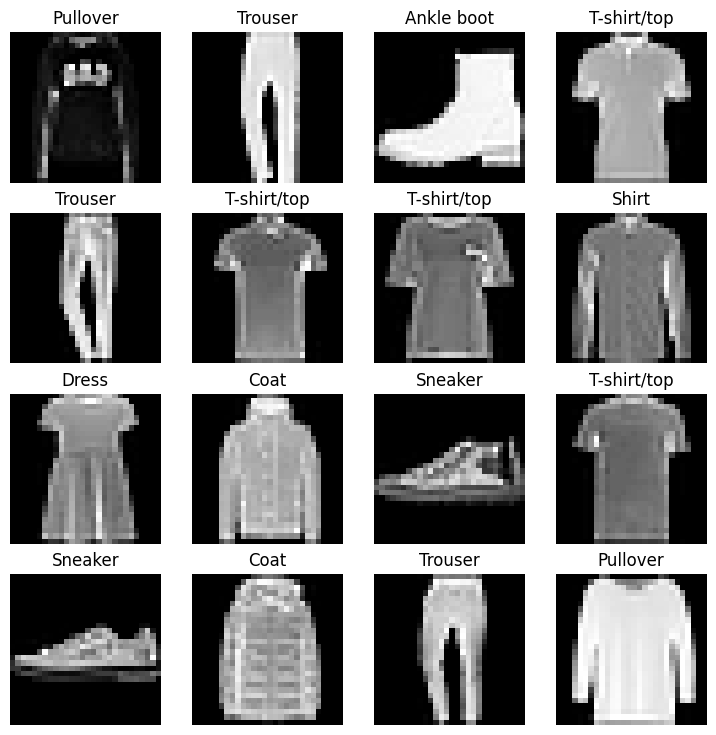

In [50]:
fig = plt.figure(figsize= (9,9))
rows,cols = 4, 4

for i in range(1 , rows*cols+1):

  random_idx = torch.randint(1, len(train_data),size=[1]).item()

  img , label = train_data[random_idx]

  fig.add_subplot(rows,cols,i)

  plt.imshow(img.squeeze(), cmap = "gray")

  plt.title(classes_name[label])

  plt.axis(False);





2. Prepare data loaders

In [53]:
import torch.utils.data
from torch.utils.data import DataLoader

# size hyper parameter

BATCH_SIZE = 32

# dataloader

train_loader = DataLoader( dataset = train_data,
                          batch_size = BATCH_SIZE,
                           shuffle = True

)

test_loader = DataLoader( dataset = test_data,
                          batch_size = BATCH_SIZE,
                           shuffle = False

)

In [55]:
len(train_loader), len(test_loader)

(1875, 313)

In [60]:
train_features_batch , train_lables_batch = next(iter(train_loader))

train_features_batch.shape , train_lables_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

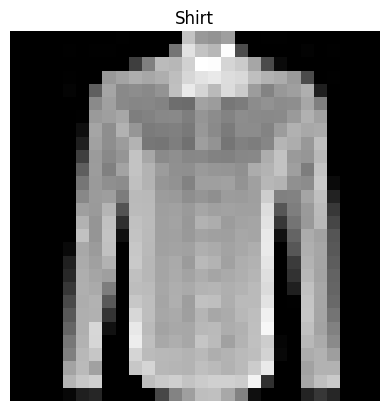

In [67]:
random_idx = torch.randint(0,len(train_features_batch),size= [1]).item()
img , label = train_features_batch[random_idx],train_lables_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(classes_name[label])
plt.axis(False);

## 3. Baseline Model

In [70]:
## Creating flattern layer

flattern = nn.Flatten()

x = train_features_batch[0]

a = flattern(x)

x.shape, a.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [85]:
## Model bulidng

class modelV(nn.Module):

  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):

    super().__init__()

    self.layer_stack = nn.Sequential(

                               nn.Flatten(),
                               nn.Linear(in_features=input_shape,out_features = hidden_units),
                               nn.Linear(in_features = hidden_units,out_features= hidden_units),
                               nn.Linear(in_features= hidden_units,out_features = output_shape) )
  def forward(self,x):
    self.layer_stack(x)




In [89]:
# passing data

model_0 = modelV(input_shape = 784,hidden_units = 8 , output_shape = len(classes_name)).to("cpu")
model_0

modelV(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [105]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

Loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.paramters(),lr=0.01)